# 6.5 Unsupervised Machine Learning: Clustering

#### Table of Contents

### 1. Importing Libraries

### 2. Importing Data and Data Cleaning

### 3. The Elbow Technique

### 4. Clustering: Decision and Explanation

### 5. k-Means Algorithm

### 6. Create a new Column: Clustering Results

### 7. Clustering Visualizations

### 8. Clustering: Descriptive Statistics

### 9. Results: Discussion

## 1. Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [3]:
#Pathway to the Dataframes
path = r'C:\Users\Dallas\Desktop\Data Analyst - Projects\Data Immersion\Data Immersion A6\FDIC Bank Failure prediction'

In [4]:
# This command propts matplotlib visuals to appear in the notebook 
%matplotlib inline

## 2. Importing Data and Data Cleaning

In [5]:
#Importing prepared dataset
df = pd.read_csv(os.path.join(path, 'Datasets', 'Prepared Data', 'DS8_BankSuite_Failures_1934-2023_clean.csv'), index_col = False)

In [6]:
#First five rows of dataset
df.head()

,Unnamed: 0,Certification,Charter Class,City,State,Country,Estimated Loss,Failure Date,FIN,ID,Bank Name,Total Assets,Total Deposits,Resolution,Transaction Type,Insurance Fund
0,1,57053,NM,NEW YORK,NY,United States,2400000,2023-03-12,10540,4106,SIGNATURE BANK,110363650.0,88612911.0,FAILURE,PA,DIF
1,2,24735,SM,SANTA CLARA,CA,United States,16100000,2023-03-07,10539,4105,SILICON VALLEY BANK,209026000.0,175378000.0,FAILURE,PA,DIF
2,3,15426,NM,ALMENA,KS,United States,16330,2020-10-23,10538,4104,ALMENA STATE BANK,65733.0,64941.0,FAILURE,PA,DIF
3,4,16748,NM,FORT WALTON BEACH,FL,United States,7247,2020-10-16,10537,4103,FIRST CITY BANK OF FLORIDA,136566.0,133936.0,FAILURE,PA,DIF
4,5,14361,NM,BARBOURSVILLE,WV,United States,45328,2020-04-03,10536,4102,THE FIRST STATE BANK,151808.0,143102.0,FAILURE,PA,DIF


In [7]:
#Remove duplicate index column
df = df.drop(columns = ['Unnamed: 0'])

In [8]:
df.shape

(3468, 15)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3468 entries, 0 to 3467
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Certification     3468 non-null   int64  
 1   Charter Class     3468 non-null   object 
 2   City              3468 non-null   object 
 3   State             3468 non-null   object 
 4   Country           3468 non-null   object 
 5   Estimated Loss    3468 non-null   int64  
 6   Failure Date      3468 non-null   object 
 7   FIN               3468 non-null   int64  
 8   ID                3468 non-null   int64  
 9   Bank Name         3468 non-null   object 
 10  Total Assets      3468 non-null   float64
 11  Total Deposits    3468 non-null   float64
 12  Resolution        3468 non-null   object 
 13  Transaction Type  3468 non-null   object 
 14  Insurance Fund    3468 non-null   object 
dtypes: float64(2), int64(4), object(9)
memory usage: 406.5+ KB


In [10]:
#Changing datatypes
df['Certification'] = df['Certification'].astype('str')
df['Estimated Loss'] = df['Estimated Loss'].astype('float64')
df['Failure Date'] = df['Failure Date'].astype('datetime64[ns]')
df['FIN'] = df['FIN'].astype('str')
df['ID'] = df['ID'].astype('str')

In [11]:
#Check the changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3468 entries, 0 to 3467
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Certification     3468 non-null   object        
 1   Charter Class     3468 non-null   object        
 2   City              3468 non-null   object        
 3   State             3468 non-null   object        
 4   Country           3468 non-null   object        
 5   Estimated Loss    3468 non-null   float64       
 6   Failure Date      3468 non-null   datetime64[ns]
 7   FIN               3468 non-null   object        
 8   ID                3468 non-null   object        
 9   Bank Name         3468 non-null   object        
 10  Total Assets      3468 non-null   float64       
 11  Total Deposits    3468 non-null   float64       
 12  Resolution        3468 non-null   object        
 13  Transaction Type  3468 non-null   object        
 14  Insurance Fund    3468 n

In [12]:
#Create subset of dataframe to include only float variables for correlation
df_filter = df.select_dtypes(include="float64")

In [13]:
df_filter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3468 entries, 0 to 3467
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Estimated Loss  3468 non-null   float64
 1   Total Assets    3468 non-null   float64
 2   Total Deposits  3468 non-null   float64
dtypes: float64(3)
memory usage: 81.4 KB


In [14]:
df_filter.describe()

,Estimated Loss,Total Assets,Total Deposits
count,3.468000e+03,3.468000e+03,3.468000e+03
mean,7.998170e+04,5.599016e+05,4.392969e+05
std,4.243630e+05,6.740647e+06,4.733224e+06
min,-1.138100e+04,1.731000e+03,0.000000e+00
25%,3.161000e+03,2.487300e+04,2.445750e+04
50%,1.130400e+04,6.876950e+04,6.734650e+04
75%,4.289825e+04,2.203200e+05,2.053102e+05
max,1.610000e+07,3.070216e+08,1.882608e+08


#### Observations: As seen in the previous task, removing the extreme outliers should yield better results with the clustering algorithm

##### Defining the Upper Limits for 'Total Assets' variable

In [15]:
#Clean the extreme values from the "Total Assets" variable observed during the consistency checks.
df_outlier = df_filter[df_filter['Total Assets'] <=221000] 

## 3. The Elbow Technique

In [16]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [17]:
#Creates a score that represents a rate of variation for the given cluster option.
score = [kmeans[i].fit(df_outlier).score(df_outlier) for i in range(len(kmeans))] 


score

C:\Users\Dallas\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Dallas\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(
C:\Users\Dallas\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Dallas\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the envi

[-18764481398384.465,
 -6370235431969.766,
 -4172725444625.255,
 -3006115128181.946,
 -2244599173857.697,
 -1895689198141.353,
 -1560465931170.6414,
 -1370008977661.6663,
 -1217447202777.8486]

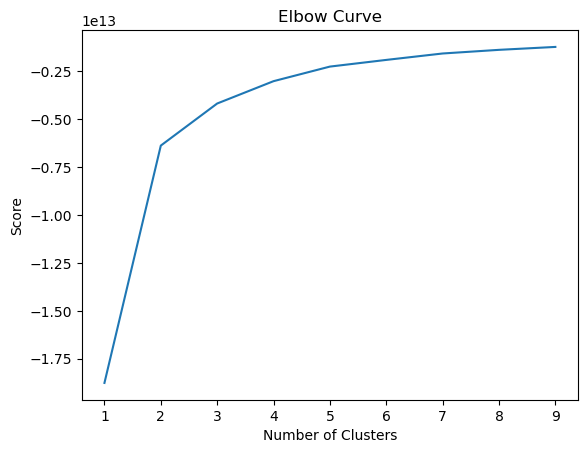

In [18]:
#Plot the elbow curve using PyLab.
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

## 4. Decision and Explanaion

#### Elbow curve begins to flatten out around 3 clusters.  We should use three groupings as this should yield the most accurate results

## 5. k-Means Algorithm

In [19]:
#Create the k-means object.
kmeans = KMeans(n_clusters = 3)

In [20]:
#Fit the k-means object to the data.
kmeans.fit(df_outlier)

C:\Users\Dallas\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Dallas\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


KMeans(n_clusters=3)

In [21]:
df_outlier['clusters'] = kmeans.fit_predict(df_outlier)

C:\Users\Dallas\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Dallas\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(
C:\Users\Dallas\AppData\Local\Temp\ipykernel_7152\3777961411.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_outlier['clusters'] = kmeans.fit_predict(df_outlier)


## 6. Create a New Column: Clustering Results

In [22]:
df_outlier.head()

,Estimated Loss,Total Assets,Total Deposits,clusters
2,16330.0,65733.0,64941.0,0
3,7247.0,136566.0,133936.0,0
4,45328.0,151808.0,143102.0,2
5,24465.0,100879.0,95159.0,0
6,2136.0,120574.0,111234.0,0


In [23]:
df_outlier['clusters'].value_counts()

1    1606
0     653
2     345
Name: clusters, dtype: int64

## 7. Clustering Visualizations

##### Total Assets & Estimated Loss

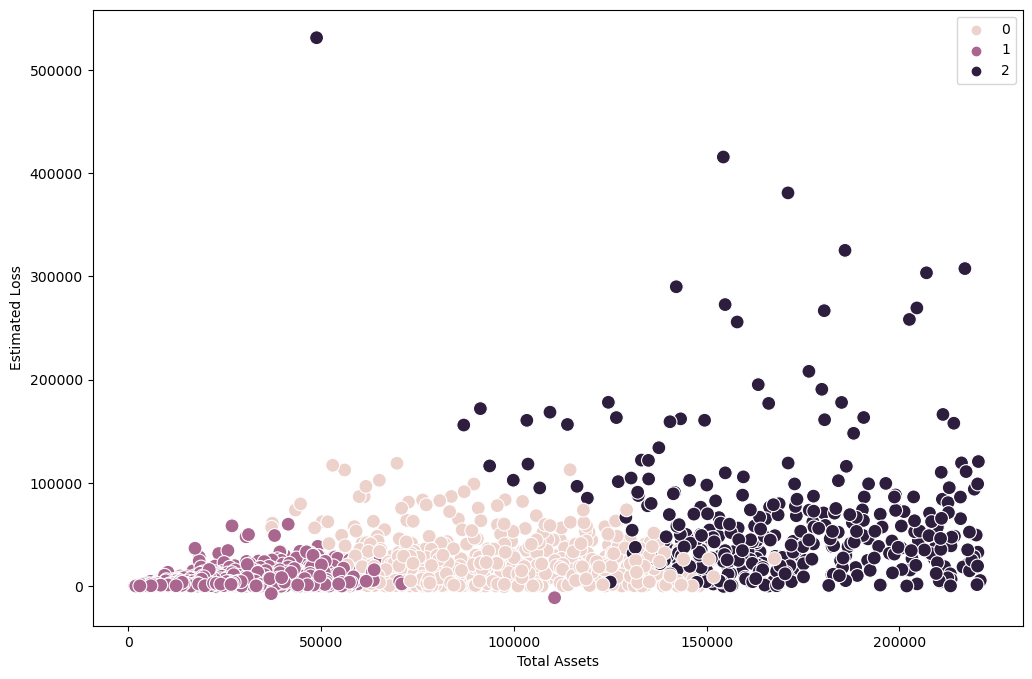

In [24]:
#Plot the clusters for the "Total Assets" and "Estimated Loss" variables.
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_outlier['Total Assets'], y=df_outlier['Estimated Loss'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Total Assets') # Label x-axis.
plt.ylabel('Estimated Loss') # Label y-axis.
plt.show()

#### Observations: There is an positive correlation between the number of assets to the Estimated Loss.  Given the x-axis range shows up to 221K, while the y-axis shows up to +500K due to the one extreme outlier in Cluster 1, it gives a slight visual bias of having a weaker correlation than what is there.  Generally, the greater the number of assets, the greater the estimated loss, which is what the scatterplot is showing.  It is interesting to note, though, that generally losses seem to plateau at around 100,000 even when assets are reaching around 200,000 (with the exception of a few notable points as seen).  Exploring the reasoning behind this may require additional information about the asset types involved, the date of failure, or possibly other factors, but is something worth noting. 

In [25]:
df_outlier.loc[df_outlier['clusters'] == 2, 'cluster'] = 'dark purple'
df_outlier.loc[df_outlier['clusters'] == 1, 'cluster'] = 'purple'
df_outlier.loc[df_outlier['clusters'] == 0, 'cluster'] = 'pink'

C:\Users\Dallas\AppData\Local\Temp\ipykernel_7152\917752655.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_outlier.loc[df_outlier['clusters'] == 2, 'cluster'] = 'dark purple'


##### Total Deposits & Estimated Loss

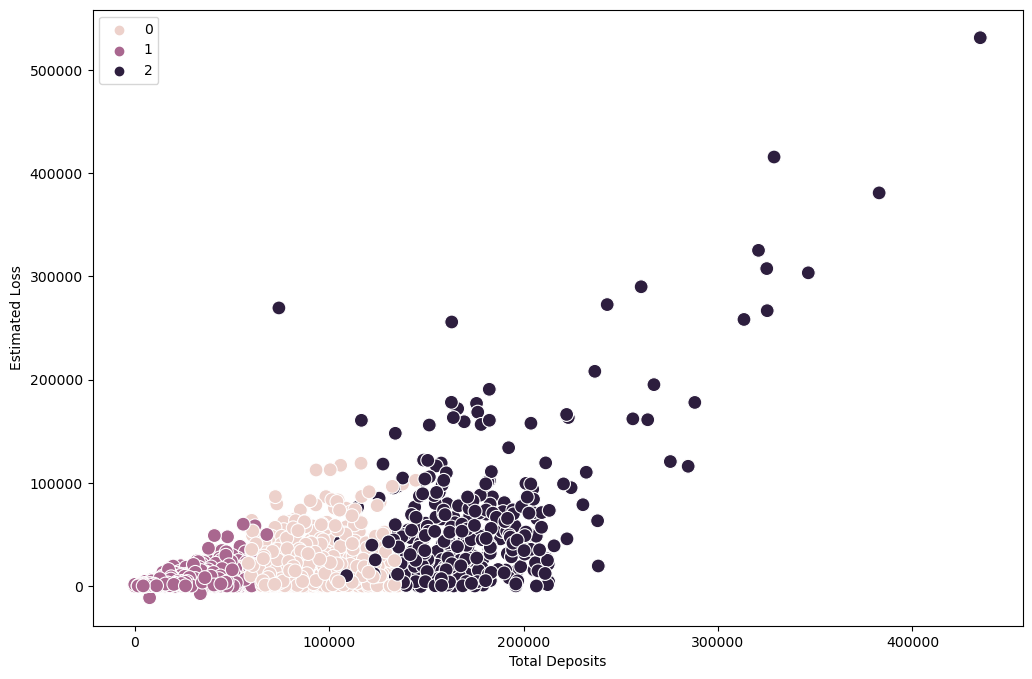

In [26]:
#Plot the clusters for the "Total Deposits" and "Estimated Loss" variables.
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_outlier['Total Deposits'], y=df_outlier['Estimated Loss'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Total Deposits') # Label x-axis.
plt.ylabel('Estimated Loss') # Label y-axis.
plt.show()

#### Observations: As a thought exercise, we also looked at the Total Deposits to Estimated Loss.  This comparison still retains the any outliers still present within the dataframe.  As seen in previous analyses, we know that these two factors have very similar correlations to Total Estimated Loss.  Seeing this type of clustering is to be expected.  

##### Total Assets & Total Deposits

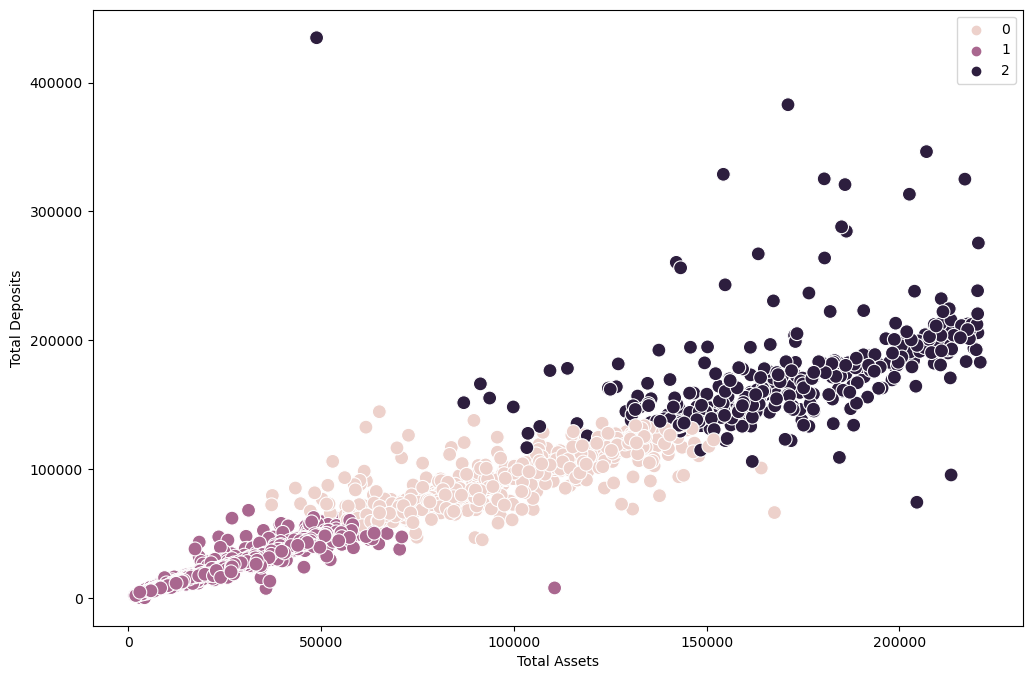

In [27]:
#Plot the clusters for the "Total Assets" and "Total Deposits" variables.
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_outlier['Total Assets'], y=df_outlier['Total Deposits'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Total Assets') # Label x-axis.
plt.ylabel('Total Deposits') # Label y-axis.
plt.show()

#### Observations: As we can see, Total Deposits and Total Assets have a very similar cluster grouping.  With the exception of a few outliers, this is to be expected, and can reasonably explain why the 'Total Deposits' to 'Estimated Loss' clustering was so similar to the comparison with 'Total Assets' to 'Estimated Loss'.

## 8. Clustering Descriptive Statistics

In [28]:
df_outlier.groupby('cluster').agg({'Estimated Loss':['mean', 'median'], 
                         'Total Assets':['mean', 'median'], 
                         'Total Deposits':['mean', 'median']})

Estimated Loss            Total Assets           Total Deposits  \
                      mean   median           mean    median           mean   
cluster                                                                       
dark purple   60869.797101  43841.0  171427.496609  169635.0  172707.519670   
pink          22156.450230  17448.0   92904.197377   89941.0   88680.426331   
purple         5893.212951   3897.5   25959.369171   22953.0   25128.728143   

                       
               median  
cluster                
dark purple  163830.0  
pink          85452.0  
purple        22464.0

## 9. Results: Discussion

#### As noted above, even though there seems to be a positive correlation between the number of assets to the estimated loss of a failed bank, we can see that the mean and median values are significantly higher in total assets compared to Estimated losses.  As seen in the scatterplot, losses seem to have a trend of capping around 100,000 despite the number of assets within the bank.  

#### This could indicated that total assets values have a diminishing impact on whether a bank will fail in the future.  A bank that has a higher number of assets could indicate a higher number of total losses, as the trend suggests, but only to a point.  While there are a certain handful of banks that break this trend, it would be prudent to see if those banks have anything else in common such as their location, date of failure, whether they are commerical banks or not, or if they were full failures or buyouts by other financial institutions.  

#### One point of inquiry could be to see if there is a liquidation ratio that these institutions seem to abide by.  If assets owned by the bank are out-weighed by liabilities owed by around 100,000 dollars, is this typically when a bank will see foreclosure?  Comparing the differential between the assets and liabilities could be very helpful indetermining when a financial instituion sees failure in the future.

##### Exporting dataframe with clustering column added

In [29]:
df_outlier.to_excel('output.xlsx', index=False)